# Ejercicios SVM

Nombre: Juan Valdiviezo

## Ejercicio 1

El objetivo de este ejercicio es que el estudiante entienda sobre los distintos kernels cuando se usan SVM. Además, como estos influyen en las regiones de decisión. Finalmente, como influyen los hyper-parámetros y como evitar overfitting.

### Ejercicio 1.1

Ejecute y analice el código siguiente

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [43]:
def mostrar_regiones(clf, X, y):
    """Muestra gráficamente los puntos generados, los support vectors, y la superficie de decisión
    """
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # muestra la superficie de decisión
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # crea una grilla con valores para evaluar la función
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # muestra la superficie de decisión y los márgenes
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # muestra los support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

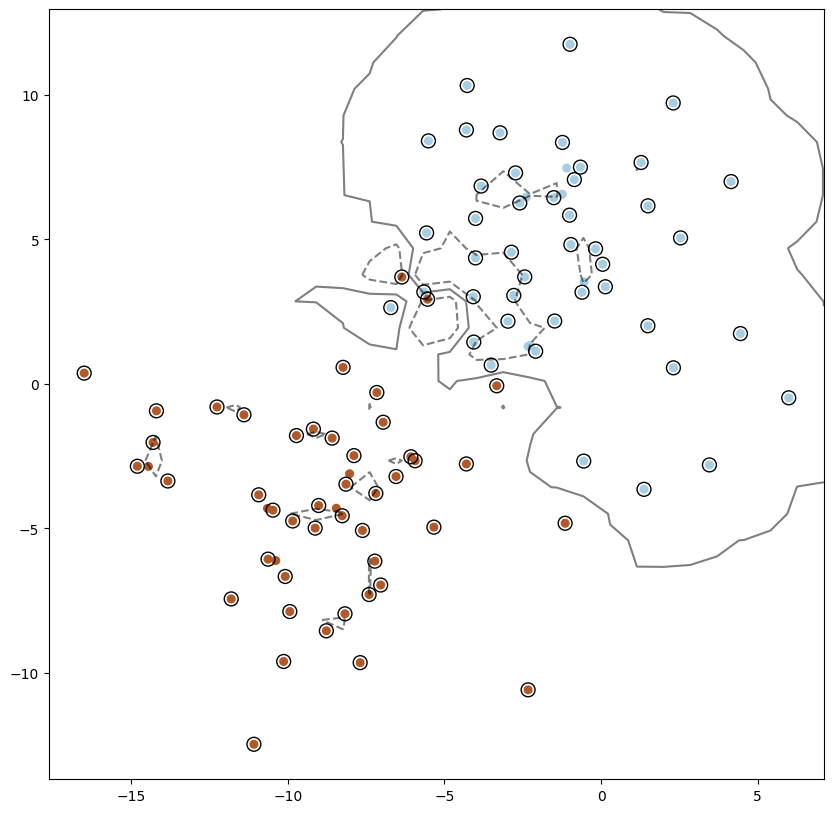

1.0

In [44]:
# se crean 100 puntos salidos de 2 distribuciones
X, y = make_blobs(n_samples=100, centers=2, cluster_std=3.5, random_state=1)

# se crea el modelo, se entrena, y se muestra en pantalla el resultado en términos de superficie de decisión
clf = svm.SVC(kernel='rbf', C=100000, gamma=1)
clf.fit(X, y)
mostrar_regiones(clf, X, y)
accuracy_score(y, clf.predict(X))

En la gráfica resultante, las instancias resaltadas corresponden a los support vectors del modelo

## Ejercicio 1.2

Modifique los parámetros $C$ y $gamma$ del código anterior. Cree combinaciones de valores altos y bajos para $C$ ($0.001 \le C \le 10000$) y $gamma$ ($0.001 \le gamma \le 100$) y analice los resultados.

¿Existe alguna combinación óptima para este problema? ¿Existen combinaciones que provoquen overfitting?

Para entender mejor sobre los hyper-parámetros $C$ y $gamma$, lea el contenido de la siguiente dirección https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c

#### **Probaremos un valor de gamma de 5 y un valor de C de 0.25**

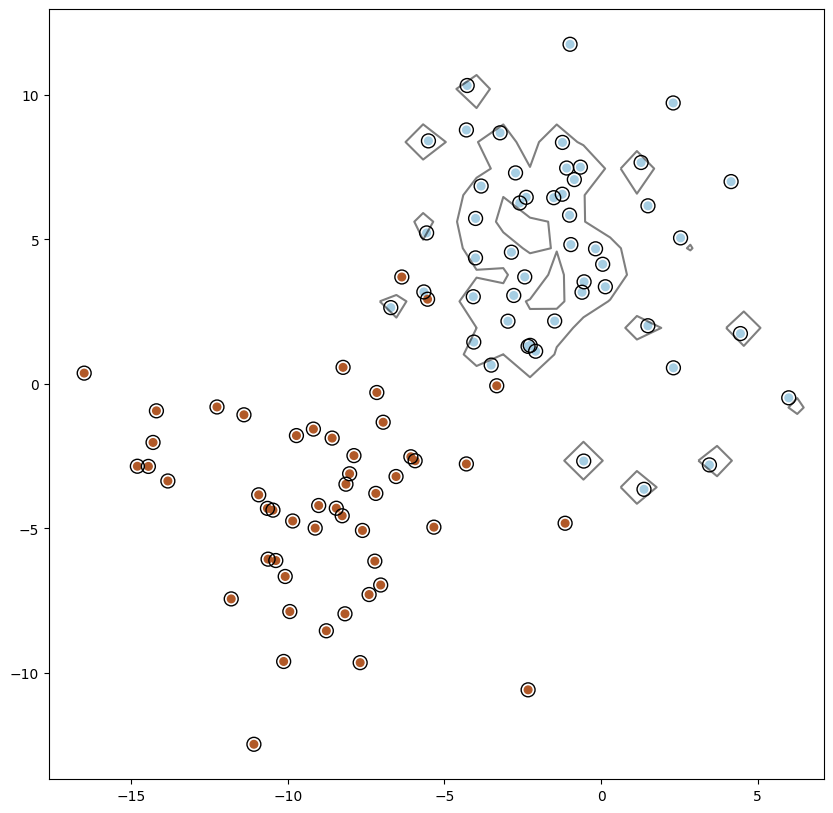

1.0

In [45]:
# se crean 100 puntos salidos de 2 distribuciones
X, y = make_blobs(n_samples=100, centers=2, cluster_std=3.5, random_state=1)

clf = svm.SVC(kernel='rbf', C=0.25, gamma=5)
clf.fit(X, y)

mostrar_regiones(clf, X, y)
accuracy_score(y, clf.predict(X))

Podemos ver que con estos valores los hiperparámetros están muy sobre ajustados y al tener un valor tan grande de gamma la línea de decisión es muy compleja ya que intenta considerar solo las instacias cercanas al hiperplano para calcular la línea de decisión.
El efecto de tener un valor de C bajo es que el modelo se da la libertad de tener demasiadas clasificaciones incorrectas.


#### **Probaremos un valor de gamma de 0.5 y un valor de C de 0.1**

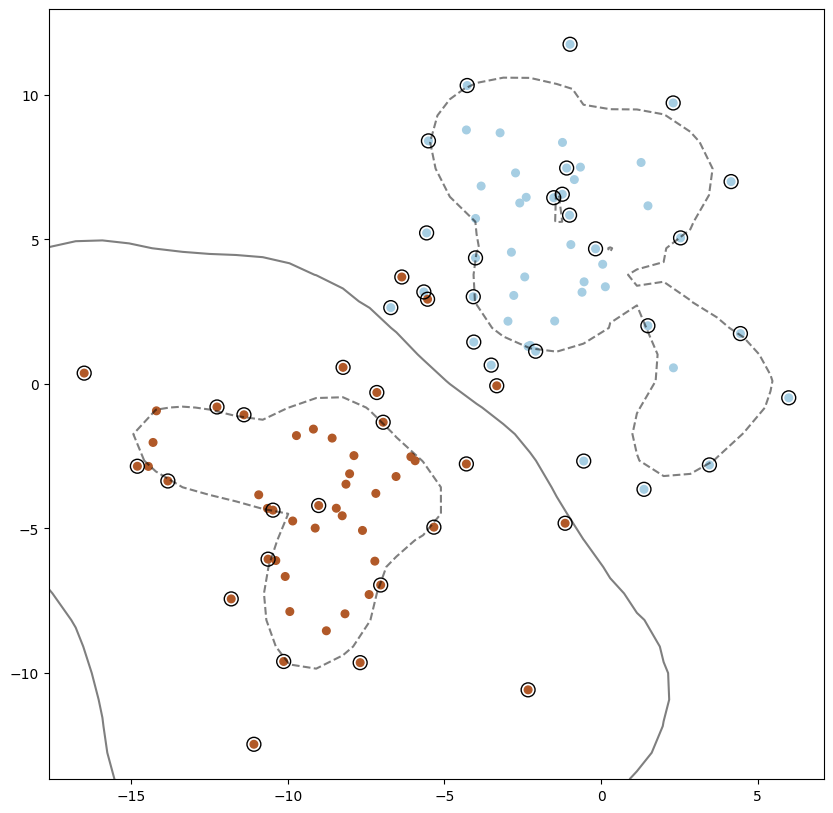

0.97

In [46]:
clf = svm.SVC(kernel='rbf', C=0.5, gamma=0.1)
clf.fit(X, y)
mostrar_regiones(clf, X, y)
accuracy_score(y, clf.predict(X))

Con estos valores se empieza a notar un poco mejor los márgenes y la superficie de decisión, el score se ha reducido pero el modelo parece mucho menos ajustado.

#### Probaremos un valor de gamma de 0.2 y un valor de C de 0.1

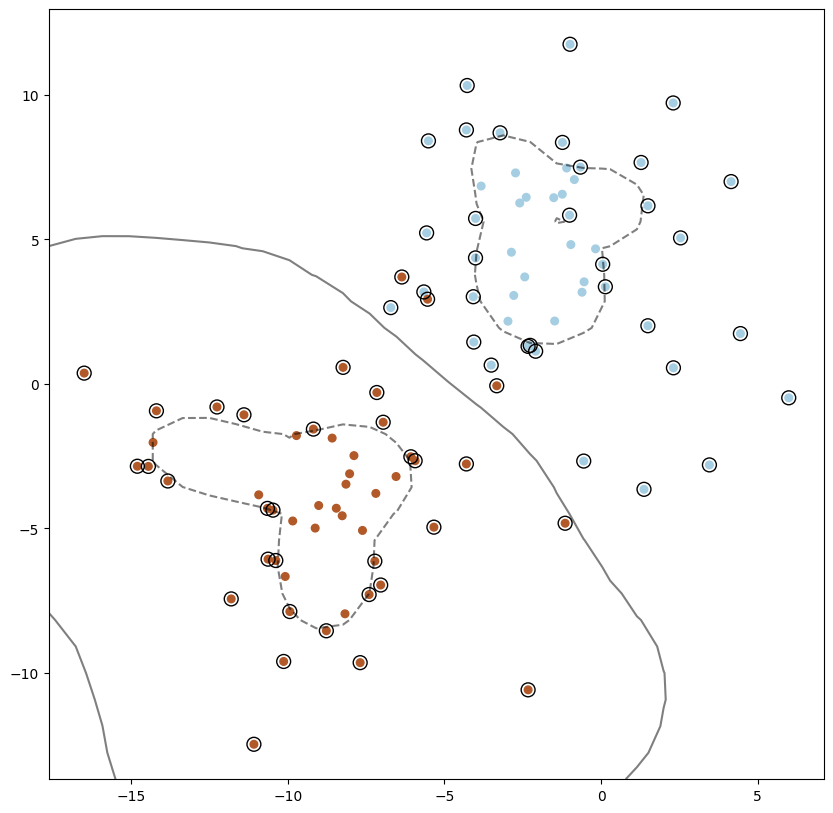

0.97

In [49]:
clf = svm.SVC(kernel='rbf', C=0.2, gamma=0.1)
clf.fit(X, y)
mostrar_regiones(clf, X, y)
accuracy_score(y, clf.predict(X))

**¿Existe alguna combinación óptima para este problema?**

Después de comprobar con estos hiperparámetros, esta parece ser una de las soluciones óptimas ya que no se encuentra ajustado y va a generalizar de mejor manera la presencia de nuevas instacias a pesar de que el score no sea el máximo. Así que podemos decir que la combinación óptima es gamma = 0.2 y C = 0.1

**¿Existen combinaciones que provoquen overfitting?**

Sí, como se mencionó anteriormente, si se utilizan valores muy altos de gamma y C, el modelo se ajustará demasiado a los datos de entrenamiento y no generalizará de buena manera la presencia de nuevas instancias. Por ejemplo, si utilizamos gamma = 100000 y C = 0.1, el modelo se ajustará demasiado a los datos de entrenamiento y no generalizará de buena manera la presencia de nuevas instancias.

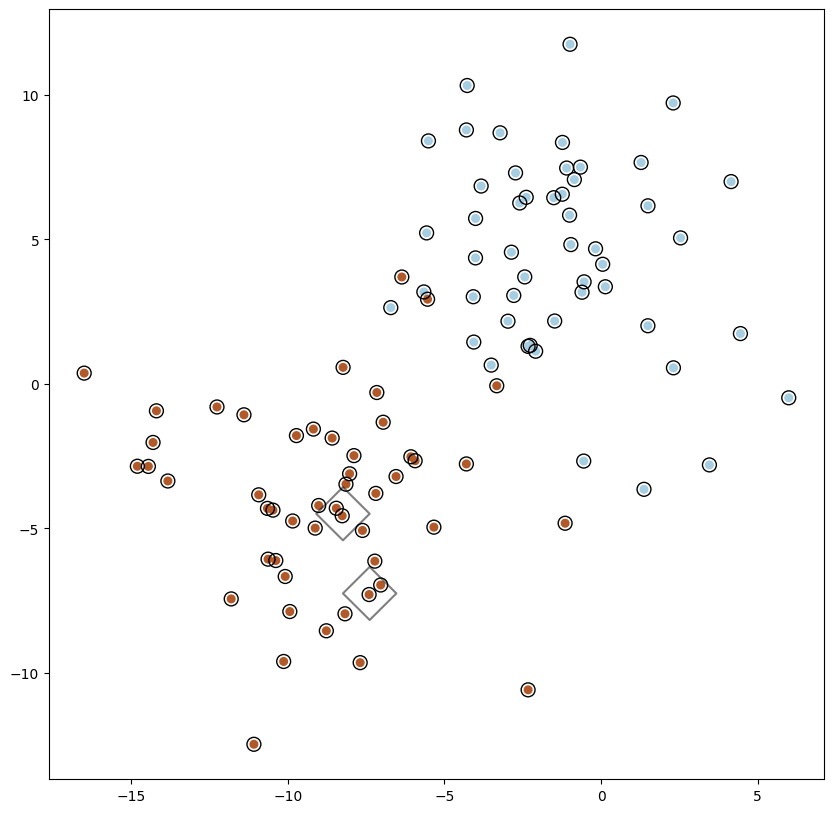

1.0

In [48]:
#Get an overfitting model with a high gamma and a low C
clf = svm.SVC(kernel='rbf', C=0.1, gamma=100000)
clf.fit(X, y)
mostrar_regiones(clf, X, y)
accuracy_score(y, clf.predict(X))
